# Credit Card Fraud Detection system


### *Business objective:   The aim of a credit card fraud detection project using machine learning (ML) is to develop a model that can accurately identify fraudulent transactions made with credit cards. The primary goal is to minimize financial losses for both credit card companies and cardholders by detecting and preventing fraudulent activity in real-time or near real-time.


### *Maximizing :  catching as many fraudulent transactions as possible to minimize financial losses.

### *Minimizing : Avoiding incorrectly flagging legitimate transactions as fraudulent, which can inconvenience customers and damage trust.

### Import Libraries 

In [10]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [3]:
df= pd.read_csv("creditcard.csv")

In [4]:
# Check top 5 rows of dataset
print(df.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
# Check 5 bottom  rows of dataset
print(df.tail(5))


            Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  

In [6]:
# Check Shape of dataset
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# EDA

<Axes: >

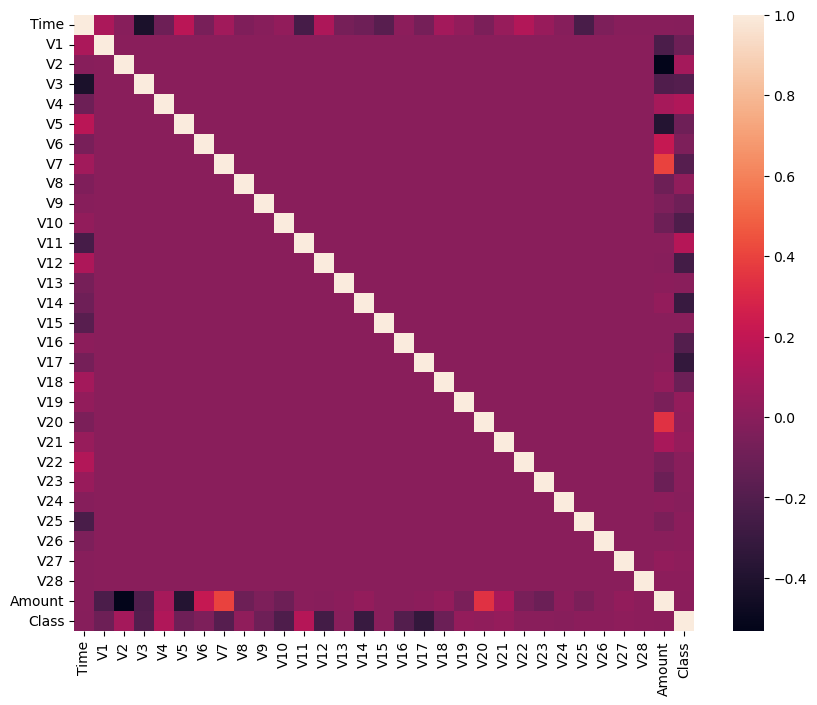

In [15]:
correlation_matrix = df.corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix)

In [16]:
# Check null values in dataset
df.isnull().sum()

# there is no null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
# we no need of Time column for that drop Time column 
df=df.drop(['Time'],axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [18]:
# After droping column check shape of Dataset 
df.shape

(284807, 30)

In [19]:
# Apply features scalling on Amount column
from sklearn.preprocessing import StandardScaler

In [20]:
StdScl= StandardScaler()
df['Amount']=StdScl.fit_transform(pd.DataFrame(df['Amount']))

In [21]:
df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0


In [22]:
# Checking the duplicated values in dataset

df.duplicated().any()

# output is true
# means it has some duplicate values

True

In [23]:
df.shape

(284807, 30)

In [24]:
# drop duplicate values

df=df.drop_duplicates()

In [25]:
df.duplicated().any()

# output is False means
# now there is no duplicate values

False

In [26]:
df.shape

# we have 9144 duplicates values are droping

(275663, 30)

###### our target column is Class

In [27]:
df['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

## Data  visualization 

<Axes: ylabel='count'>

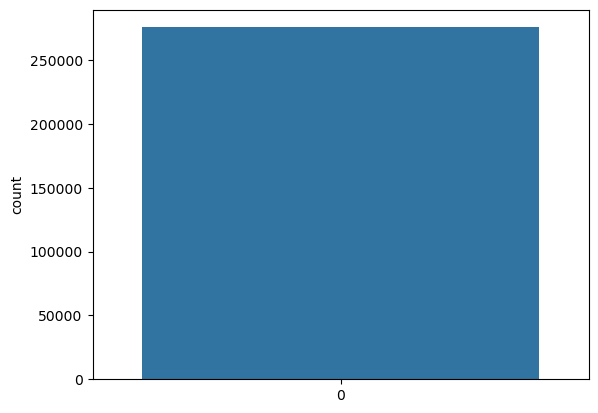

In [29]:
sns.countplot(df['Class'])

### Data is highly inbalenced

In [30]:
X = df.drop('Class',axis=1)
y = df['Class']

# Splitting ,Training and Testing data.

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [32]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

# Data is highly unbalance 

## Undersampling and Oversampling


#### Check the Accuracy of current data

# Logistic Regression


In [33]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_pred1 = logReg.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred1)

# Logistic Reg model 99% accurate

0.9992200678359603

In [37]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [38]:
precision_score(y_test,y_pred1)

0.8870967741935484

In [39]:
recall_score(y_test,y_pred1)

0.6043956043956044

In [40]:
f1_score(y_test,y_pred1)

0.718954248366013

In [41]:
# precision_score,recall_score,f1_score are very less than accuracy score due to inbalence data set 

# Handle inbalence dataset


# 1. UndedrSampling


In [42]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [43]:
normal.shape

(275190, 30)

In [44]:
fraud.shape

(473, 30)

In [45]:
normal_sample=normal.sample(n=473)
# this sasmple methodchoose 473 random sample 

In [46]:
normal_sample.shape

(473, 30)

In [47]:
new_df = pd.concat([normal_sample,fraud],ignore_index=True)

In [48]:
new_df['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [49]:
new_df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.807824,-0.479712,-1.263476,0.578825,-0.252824,-1.076486,0.326608,-0.293512,0.913469,-0.162551,...,-0.174236,-0.598374,0.174959,-0.052436,-0.139240,-0.546620,-0.033841,-0.032848,0.131698,0
1,-1.983447,-1.356733,-0.208170,0.595668,1.562860,-1.474237,1.382446,-0.717527,0.185458,0.045894,...,0.036023,1.498254,1.068176,-0.026595,0.544657,0.223056,0.175595,-0.281347,0.026029,0
2,1.016707,-1.120209,-0.397657,-0.634281,-0.582590,-0.278783,-0.044155,-0.211456,-1.132561,0.625453,...,0.297303,0.436349,-0.461596,-0.256753,0.802393,-0.066233,-0.048701,0.026165,0.547939,0
3,-1.270509,0.949696,-0.126581,-0.545426,0.402903,-1.290811,0.496243,0.372927,0.357345,-1.582037,...,-0.176407,-0.544719,-0.217346,-0.170101,0.066549,-0.075559,0.090970,0.126357,-0.283943,0
4,0.214965,-0.452899,1.136835,0.439583,-0.648157,0.590236,-0.449413,0.215004,-0.700302,0.564139,...,-0.169205,-0.103711,0.445403,0.520788,-0.662948,-0.669934,0.095372,0.008072,0.051377,0


In [50]:
X = new_df.drop('Class',axis=1)
y = new_df['Class']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

#  <i> Logistic Regression </i>

In [52]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred1 = logReg.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test,y_pred1)

# Logistic Reg model 94% accurate

0.9526315789473684

In [56]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [57]:
precision_score(y_test,y_pred1)

1.0

In [58]:
recall_score(y_test,y_pred1)

0.9117647058823529

In [59]:
f1_score(y_test,y_pred1)

0.9538461538461539

# <i>Random Forest</i> 

In [60]:
from sklearn.ensemble import RandomForestClassifier
RandF = RandomForestClassifier()
RandF.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
y_pred2 = RandF.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred2)

0.9473684210526315

In [63]:
precision_score(y_test,y_pred2)

0.9791666666666666

In [64]:
recall_score(y_test,y_pred2)

0.9215686274509803

In [65]:
f1_score(y_test,y_pred2)

0.9494949494949494

### Compare LR and RF model which is best

In [66]:
final_df= pd.DataFrame({'Models':['LR','RF'],
             'Acc':[accuracy_score(y_test,y_pred1)*100,
                    accuracy_score(y_test,y_pred2)*100,
                   ]})

In [67]:
final_df

,Models,Acc
0,LR,95.263158
1,RF,94.736842


<Axes: xlabel='Models', ylabel='Acc'>

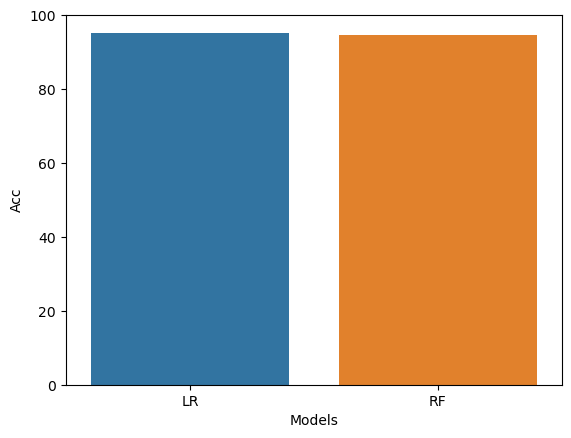

In [68]:
sns.barplot(x = "Models", y = "Acc", data=final_df)


# OverSampling  

In [69]:
X = df.drop('Class',axis=1)
y = df['Class']

In [70]:
df.shape

(275663, 30)

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
X_res,y_res= SMOTE().fit_resample(X,y)

In [73]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

#  <i> Logistic Regression </i>

In [75]:
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression()

In [76]:
y_pred1 = logReg.predict(X_test)

In [77]:
accuracy_score(y_test,y_pred1)

0.9452287510447327

In [78]:
precision_score(y_test,y_pred1)

0.972831543987024

In [79]:
recall_score(y_test,y_pred1)

0.9159682199152773

# <i>Random Forest</i>

In [81]:
RandF = RandomForestClassifier()
RandF.fit(X_train,y_train)

RandomForestClassifier()

In [83]:
y_pred2 = RandF.predict(X_test)


In [84]:
accuracy_score(y_test,y_pred2)

0.9999273229405138

In [85]:
precision_score(y_test,y_pred2)

0.9998545745396376

In [86]:
recall_score(y_test,y_pred2)

1.0

### Compare LR and RF model which is best

In [87]:
final_df= pd.DataFrame({'Models':['LR','RF'],
             'Acc':[accuracy_score(y_test,y_pred1)*100,
                    accuracy_score(y_test,y_pred2)*100,
                   ]})

<Axes: xlabel='Models', ylabel='Acc'>

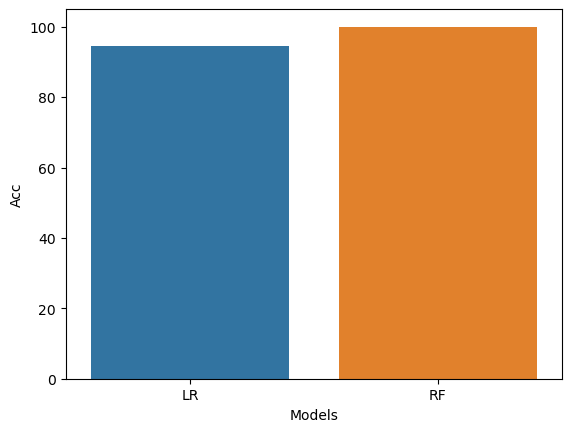

In [88]:
sns.barplot(x = "Models", y = "Acc", data=final_df)


# Random Forest is best model because it has high accuracy 

# Model Building

In [89]:
RandF1 = RandomForestClassifier()
RandF1.fit(X_res,y_res)

RandomForestClassifier()

In [148]:
import joblib

In [149]:
joblib.dump(RandF1,'Credit_Card_Model')

['Credit_Card_Model']

In [150]:
model= joblib.load('Credit_Card_Model')

### predicted Fraud Transaction  or Normal Trasaction

In [151]:
model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [152]:
if pred ==0:
    print("Normal Trasaction")
else:
    print("Fraud Transaction")

Normal Trasaction


# GUI Building

In [156]:
from tkinter import *
import joblib

def show_entry_fields():
    v1=float(e1.get())
    v2=float(e2.get())
    v3=float(e3.get())
    v4=float(e4.get())
    v5=float(e5.get())
    v6=float(e6.get())

    v7=float(e7.get())
    v8=float(e8.get())
    v9=float(e9.get())
    v10=float(e10.get())
    v11=float(e11.get())
    v12=float(e12.get())

    v13=float(e13.get())
    v14=float(e14.get())
    v15=float(e15.get())
    v16=float(e16.get())
    v17=float(e17.get())
    v18=float(e18.get())


    v19=float(e19.get())
    v20=float(e20.get())
    v21=float(e21.get())
    v22=float(e22.get())
    v23=float(e23.get())
    v24=float(e24.get())


    v25=float(e25.get())
    v26=float(e26.get())
    v27=float(e27.get())
    v28=float(e28.get())
    v29=float(e29.get())


    model = joblib.load('Credit_Card_Model')
    y_pred = model.predict([[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]])
    list1=[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]

    result = []
    if y_pred ==0:

        result.append("Normal Transcation")
    else:

        result.append("Fraudulent Transcation")
    print("######################################")
    print("Credit Card Fraud Detection System", result)
    print("######################################")



    Label(master, text="Final Prediction from the model - credit card fraud detection").grid(row=31)
    Label(master, text=result).grid(row=32)



master = Tk()
master.title("Credit Card Fraud Detection System")


label = Label(master, text = "Credit Card Fraud Detection System"
                          , bg = "black", fg = "white",width = 30).grid(row=0,columnspan=2)


Label(master, text="Enter value of V1").grid(row=1)
Label(master, text="Enter value of V2").grid(row=2)
Label(master, text="Enter value of V3").grid(row=3)
Label(master, text="Enter value of V4").grid(row=4)
Label(master, text="Enter value of V5").grid(row=5)
Label(master, text="Enter value of V6").grid(row=6)

Label(master, text="Enter value of V7").grid(row=7)
Label(master, text="Enter value of V8").grid(row=8)
Label(master, text="Enter value of V9").grid(row=9)
Label(master, text="Enter value of V10").grid(row=10)
Label(master, text="Enter value of V11").grid(row=11)
Label(master, text="Enter value of V12").grid(row=12)

Label(master, text="Enter value of V13").grid(row=13)
Label(master, text="Enter value of V14").grid(row=14)
Label(master, text="Enter value of V15").grid(row=15)
Label(master, text="Enter value of V16").grid(row=16)
Label(master, text="Enter value of V17").grid(row=17)
Label(master, text="Enter value of V18").grid(row=18)

Label(master, text="Enter value of V19").grid(row=19)
Label(master, text="Enter value of V20").grid(row=20)
Label(master, text="Enter value of V21").grid(row=21)
Label(master, text="Enter value of V22").grid(row=22)
Label(master, text="Enter value of V23").grid(row=23)
Label(master, text="Enter value of V24").grid(row=24)

Label(master, text="Enter value of V25").grid(row=25)
Label(master, text="Enter value of V26").grid(row=26)
Label(master, text="Enter value of V27").grid(row=27)
Label(master, text="Enter value of V28").grid(row=28)
Label(master, text="Enter value of V29").grid(row=29)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)

e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18= Entry(master)

e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)
e23= Entry(master)
e24 = Entry(master)


e25 = Entry(master)
e26= Entry(master)
e27 = Entry(master)
e28 = Entry(master)
e29= Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)


e13.grid(row=13, column=1)
e14.grid(row=14, column=1)
e15.grid(row=15, column=1)
e16.grid(row=16, column=1)
e17.grid(row=17, column=1)
e18.grid(row=18, column=1)


e19.grid(row=19, column=1)
e20.grid(row=20, column=1)
e21.grid(row=21, column=1)
e22.grid(row=22, column=1)
e23.grid(row=23, column=1)
e24.grid(row=24, column=1)

e25.grid(row=25, column=1)
e26.grid(row=26, column=1)
e27.grid(row=27, column=1)
e28.grid(row=28, column=1)
e29.grid(row=29, column=1)
 
Button(master, text='Predict', command=show_entry_fields).grid(row=30, column=1, sticky=W, pady=4)

mainloop( )

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


######################################
Credit Card Fraud Detection System ['Normal Transcation']
######################################
